In [ ]:
import numpy as np
import pandas as pd
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from matplotlib import pyplot as plt

In [3]:
db_data = pd.read_csv('sample_data/diabetes.csv')
db_data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [4]:
zero = ['Glucose','BloodPressure','SkinThickness','Insulin','BMI']
for column in zero:
  db_data[column] = db_data[column].replace(0,np.NaN)
  mean = int (db_data[column].mean(skipna=True))
  db_data[column] = db_data[column].replace(np.NaN,mean)
db_data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.0,155.0,33.6,0.627,50,1
1,1,85.0,66.0,29.0,155.0,26.6,0.351,31,0
2,8,183.0,64.0,29.0,155.0,23.3,0.672,32,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101.0,76.0,48.0,180.0,32.9,0.171,63,0
764,2,122.0,70.0,27.0,155.0,36.8,0.340,27,0
765,5,121.0,72.0,23.0,112.0,26.2,0.245,30,0
766,1,126.0,60.0,29.0,155.0,30.1,0.349,47,1


In [ ]:
x = db_data.iloc[:,0:8]
y = db_data.iloc[:,8]
x_train, x_test, y_train, y_test = train_test_split(x,y,random_state=0, test_size=0.2)

In [ ]:
sc_x = StandardScaler()
x_train = sc_x.fit_transform(x_train)
x_test = sc_x.fit_transform(x_test)

In [ ]:
import math
math.sqrt(len(y_test))

12.409673645990857

In [ ]:
classifier = KNeighborsClassifier (n_neighbors = 11, p = 2, metric = 'euclidean')
classifier.fit(x_train,y_train)

KNeighborsClassifier(metric='euclidean', n_neighbors=11)

In [ ]:
y_pred = classifier.predict(x_test)

In [ ]:
cm = confusion_matrix (y_test, y_pred)
print(cm)
print(f1_score(y_test, y_pred))
print(accuracy_score(y_test, y_pred))

[[95 12]
 [18 29]]
0.6590909090909092
0.8051948051948052


0.19480519480519481
0.19480519480519481
0.19480519480519481
0.19480519480519481
0.19480519480519481
0.19480519480519481
0.19480519480519481
0.19480519480519481
0.19480519480519481
0.19480519480519481
0.19480519480519481
0.19480519480519481
0.19480519480519481
0.19480519480519481
0.19480519480519481
0.19480519480519481
0.19480519480519481
0.19480519480519481
0.19480519480519481
0.19480519480519481
0.19480519480519481
0.19480519480519481
0.19480519480519481
0.19480519480519481
0.19480519480519481
0.19480519480519481
0.19480519480519481
0.19480519480519481
0.19480519480519481
0.19480519480519481
0.19480519480519481
0.19480519480519481
0.19480519480519481
0.19480519480519481
0.19480519480519481
0.19480519480519481
0.19480519480519481
0.19480519480519481
0.19480519480519481


Text(0, 0.5, 'Mean Error')

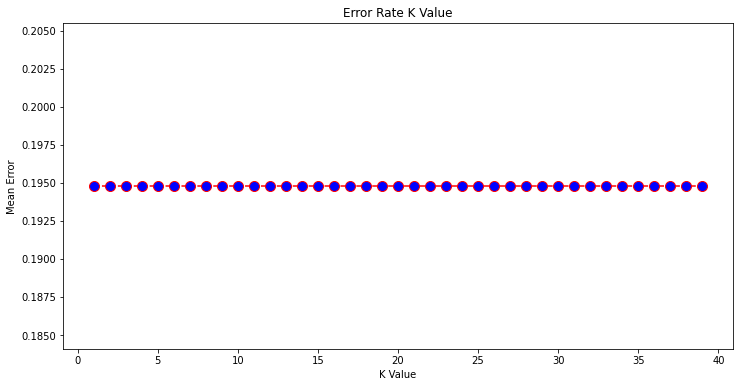

In [ ]:
error = []
for i in range (1, 40):
  knn = KNeighborsClassifier(n_neighbors=11)
  knn.fit(x_train, y_train)
  pred_i = knn.predict (x_test)
  error.append(np.mean(pred_i != y_test))
  print(np.mean(pred_i != y_test))

plt.figure(figsize = (12,6))
plt.plot(range(1, 40), error, color='red', linestyle='dashed', marker='o', markerfacecolor='blue', markersize=10)
plt.title('Error Rate K Value')
plt.xlabel('K Value')
plt.ylabel('Mean Error')